# Clustering

Clustering (Kümeleme) metodları önemli Unsupervised Learning teknikleri içinde yer alır.

<img src='images/clustering_0.png' />

Clustering'de amaç, label'ları bilinmeyen data noktalarının birbirine benzer olanlarını aynı gruplara toplamaktır.

<img src='images/clustering_1.png' />

<img src='images/clustering_2.png' />

Clustering Algoritmaları gerçek hayatta:
* Market Segmentasyonu
* İstatiskiksel Veri Analizi
* Sosyal Media Analizi
* Image Segmentation
* Anomaly Detection

gibi pek çok alanda yaygın olarak kullanılır.

https://developers.google.com/machine-learning/clustering/clustering-algorithms

Clustering Türleri:
* Centroid-based Clustering (Partitioning Clustering) -> K-Means
* Density-based Clustering
* Distribution-based Clustering
* Hierarchical Clustering

En yaygın kullanılan Clustering Algoritması **K-Means** Clustering'dir.

## K-Means Clustering

https://developers.google.com/machine-learning/glossary#k-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

K-Means'ın amacı, data içindeki grupları bulmaktır. 

Bulunacak grup sayısı **K** ile ifade edilir.

K-Means Algoritması her bir data noktasını, belirlenmiş benzerlik kriterine göre, K gruptan birine atar.

Bu şekilde tüm veri noktalarını gruplandırmış olur.

<img src='images/kmeans_1.png' />

K-Means için en önemli konuların başında doğru K değerini bulmak gelir.

Bunun için genelde **Elbow Method** (Dirsek Metodu) kullanılır.

**Centroid:**

Cluster'ların merkez noktası. K adet bulunur.

**WCSS (Within Cluster Sum of Squares):**

Cluster içindeki her bir noktanın `Centroid`'e olan uzaklıkları toplamı.

Bu toplam ne kadar küçükse, noktalar birbirine o kadar yakındır, dolayısı ile aynı cluster içinde olma olasılıkları daha yüksektir.

Scikit-Learn'de **inertia_** olarak geçer.

En küçük **inertia_**'yı veren nokta en uygun **centroid**'dir.

---

<img src='images/inertia.png' />

---

<img src='images/elbow.png' />

---

### K-Means Uygulama

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset'i import edelim

df = pd.read_csv('data/Mall_Customers.csv', index_col='CustomerID')
df

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [3]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# null (NaN) kontrolü

df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Data setimizde hiç null değer yok.

In [7]:
# Duplike (Mükerrer) data kontrolü 

df.drop_duplicates(inplace=True)

In [8]:
# input olarak sadece Spending_Score ve Annual_Income_(k$) kullanalım
# kolay görselleştirme için

X = df.iloc[:, [2, 3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Şimdi elbow method ile optimum K değerini bulalım:

In [9]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia_ bu model için wcss değerini döner
    wcss.append(kmeans.inertia_)

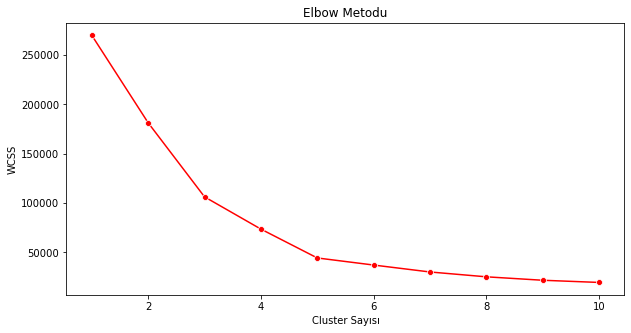

In [10]:
# şimdi wcss değerlerini görelim

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')

plt.title('Elbow Metodu')

plt.xlabel('Cluster Sayısı')
plt.ylabel('WCSS')

plt.show()

Açıkça görüldüğü gibi en ciddi kırılma (dirsek) K = 5 noktasında olmuş.

Dolayısı ile en uygun K değeri 5'tir diyebiliriz bu data set için.

In [11]:
K = 5

Şimdi bulduğumuz K değeri ile KMeans Modeli kuralım:

In [12]:
# K-Means

kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state = 42)

# fit ve predict 
y_kmeans = kmeans.fit_predict(X)

Şimdi y_kmeans'ı görselleştirelim:

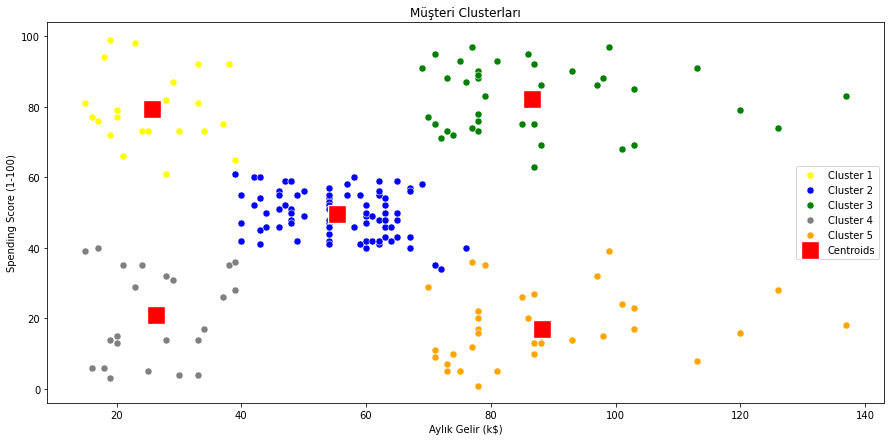

In [13]:
plt.figure(figsize=(15,7))

# K = 5 için
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], 
                kmeans.cluster_centers_[:, 1], 
                color = 'red', 
                label = 'Centroids',
                s=300,
                marker=',')

plt.grid(False)

plt.title('Müşteri Clusterları')

plt.xlabel('Aylık Gelir (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()

Görüldüğü gibi, Alışveriş Merkezi müşterilerini, Yıllık Gelir ve Harcama Skoruna göre, 5 grup altında toplayabibildik.